<a href="https://colab.research.google.com/github/samarghz/my-awesome-repo/blob/main/Gold_Price_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics 

In [2]:
gold_data=pd.read_csv('/content/gld_price_data.csv')

In [3]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
gold_data.shape

(2290, 6)

In [5]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [7]:
gold_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
correlation=gold_data.corr()

<AxesSubplot:>

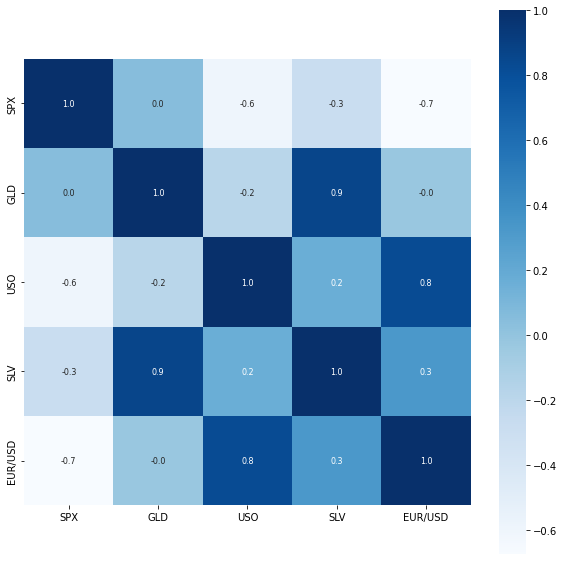

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [11]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

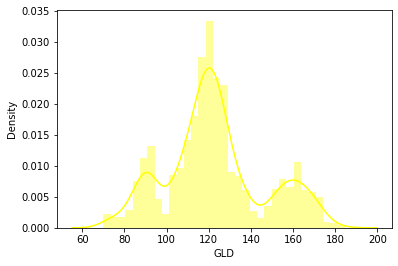

In [12]:
sns.distplot(gold_data['GLD'],color='yellow')

In [13]:
x=gold_data.drop(['GLD','Date'],axis=1)
y=gold_data['GLD']

In [14]:
print(x)
print(y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [16]:
regressor=RandomForestRegressor(n_estimators=100)

In [17]:
regressor.fit(x_train,y_train)

RandomForestRegressor()

In [18]:
x_test_prediction=regressor.predict(x_test)
print(x_test_prediction)

[168.64069929  82.26989986 116.09949973 127.56580071 120.51600144
 154.72299783 150.36119824 126.10620017 117.4347987  125.85840097
 116.76820112 172.06060089 141.44049827 167.86119837 115.21390048
 117.72000007 139.39390322 170.114401   159.39330297 158.97779882
 155.24130028 125.32220067 176.45709922 156.66350362 125.17530057
  93.55379969  78.07069976 120.43880013 119.18929954 167.39609971
  88.22590034 125.12030021  91.08520057 117.70770016 121.26249895
 135.9025007  115.49780088 114.92930097 146.66009992 107.26770113
 104.37610219  87.25319788 126.41570062 117.86700002 153.53729909
 119.67209988 108.49990018 108.15559848  93.2396006  127.05349785
  75.07530026 113.75779946 121.5975004  111.3158992  118.78849882
 120.17419949 158.24200037 168.6084015  146.71779644  85.8283983
  94.41110025  86.73429913  90.62679995 118.86900068 126.3818005
 127.57290009 169.84250023 122.14939928 117.3736991   98.49130058
 168.69550159 142.8119982  130.97770253 121.25440219 120.94729956
 119.8569004

In [ ]:
# R squared error 
score_1=metrics.r2_score(y_test,x_test_prediction)

#Mean_absolute error 
score_2=metrics.mean_absolute_error(y_test,x_test_prediction)

print('Rsquar error :',score_1)
print('mean abs error :',score_2)

Rsquar error : 0.9889567009029835
mean abs error : 1.3398186077947605


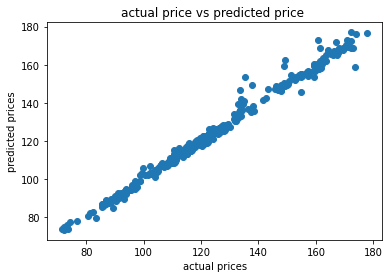

In [19]:
plt.scatter(y_test,x_test_prediction)
plt.xlabel('actual prices')
plt.ylabel('predicted prices')
plt.title('actual price vs predicted price ')
plt.show()

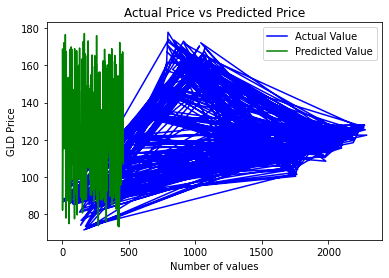

In [21]:
plt.plot(y_test, color='blue', label = 'Actual Value')
plt.plot(x_test_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()
